In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

Epoch 1/10
600/600 [==============================] - 31s 28ms/step - loss: 0.0430 - val_loss: 0.0238
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0207 - val_loss: 0.0181
Epoch 3/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0168 - val_loss: 0.0151
Epoch 4/10
600/600 [==============================] - 15s 24ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 5/10
600/600 [==============================] - 15s 24ms/step - loss: 0.0131 - val_loss: 0.0121
Epoch 6/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0119 - val_loss: 0.0113
Epoch 7/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 8/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 9/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 10/10
600/600 [==============================] - 14s 24ms/step - loss: 0.009

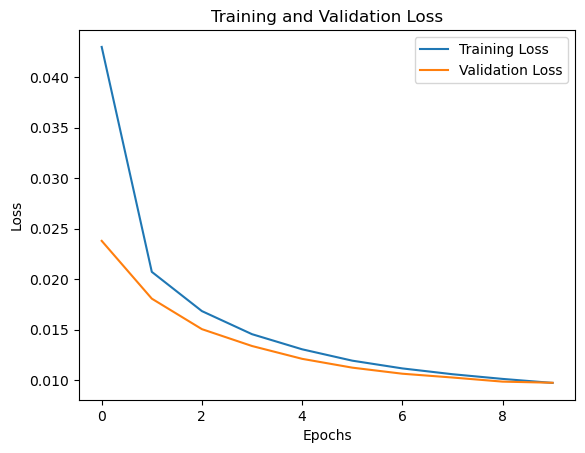

1/1 [==============================] - 1s 1s/step


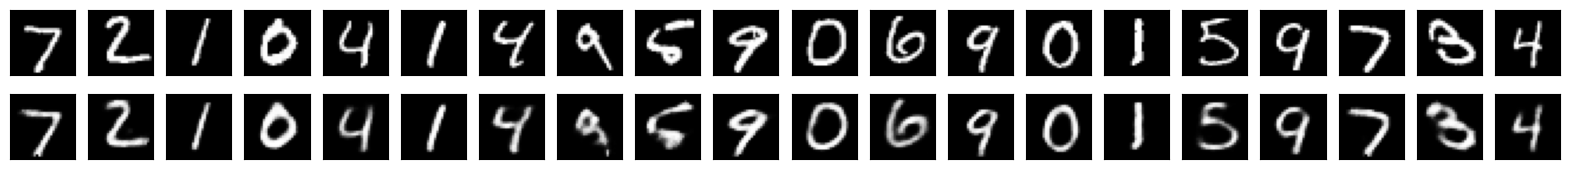

In [2]:

# Завантаження даних
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Стандартизація вхідних даних
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

batch_size = 100

input_img = Input((28, 28, 1))
x = Flatten()(input_img)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

d = Dense(64, activation='relu')(encoded)
d = Dense(128, activation='relu')(d)
d = Dense(256, activation='relu')(d)
d = Dense(28 * 28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

autoencoder = Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Навчання моделі та збереження історії навчання
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Побудова графіку функції втрат на тренувальних і тестових даних
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

n = 20

imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

plt.show()

def plot_digits(*images):
  images = [x.squeeze() for x in images]
  n = images[0].shape[0]  # число изображений

  plt.figure(figsize=(n, len(images)))
  for j in range(n):
    for i in range(len(images)):
      ax = plt.subplot(len(images), n, i * n + j + 1)
      plt.imshow(images[i][j])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()


def plot_homotopy(frm, to, n=20, autoencoder=None):
  z = np.zeros(([n] + list(frm.shape)))
  for i, t in enumerate(np.linspace(0., 1., n)):
    z[i] = frm * (1 - t) + to * t  # Гомотопия по прямой
  if autoencoder:
    plot_digits(autoencoder.predict(z, batch_size=n))
  else:
    plot_digits(z)


#frm, to = x_test[y_test == 5][1:3]
#plot_homotopy(frm, to)
#plot_homotopy(frm, to, autoencoder=autoencoder)